In [82]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from tqdm import tqdm
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier

In [3]:
test = pd.read_csv('../data/dataset.tsv', sep='\t', dtype=str)
test.tid = test.tid.apply(lambda x: str(x))
test = test[~test.text.isna()]

In [4]:
labels = []
for item in test.labels.values:
    labels.extend(str(item).split(','))

In [5]:
from collections import Counter
Counter(labels)

Counter({'care': 2713,
         'purity': 997,
         'subversion': 2415,
         'loyalty': 2236,
         'cheating': 3923,
         'harm': 4390,
         'non-moral': 15503,
         'fairness': 2438,
         'betrayal': 1611,
         'nan': 2785,
         'authority': 1749,
         'degradation': 1755})

In [6]:
test.corpus.unique()

array(['ALM', 'Baltimore', 'BLM', 'Davidson', 'Election', 'MeToo',
       'Sandy'], dtype=object)

In [7]:
# each corpus label distribution
for domain in test.corpus.unique():
    print(domain)
    print(Counter(test[test.corpus == domain].labels.values.tolist()).most_common(10))

ALM
[(nan, 920), ('non-moral', 782), ('harm', 524), ('fairness', 448), ('care', 344), ('cheating', 338), ('authority', 208), ('loyalty', 185), ('degradation', 92), ('harm,cheating', 69)]
Baltimore
[('non-moral', 3214), (nan, 512), ('loyalty', 290), ('betrayal', 254), ('cheating', 182), ('cheating,betrayal', 112), ('care', 111), ('subversion', 87), ('fairness', 75), ('harm', 65)]
BLM
[('non-moral', 939), ('fairness', 412), ('loyalty', 411), ('harm', 351), ('cheating', 305), ('care', 201), ('harm,cheating', 180), ('subversion', 157), ('cheating,harm', 143), ('degradation', 133)]
Davidson
[('non-moral', 4411), (nan, 89), ('non-moral,harm', 67), ('harm', 50), ('degradation', 47), ('non-moral,loyalty', 30), ('non-moral,cheating', 22), ('betrayal', 16), ('harm,non-moral', 14), ('cheating', 12)]
Election
[('non-moral', 2284), ('fairness', 346), ('cheating', 315), ('harm', 240), ('care', 194), ('non-moral,harm', 182), ('purity', 180), (nan, 176), ('non-moral,cheating', 139), ('loyalty', 77)]
M

In [9]:
test[test.corpus == 'ALM'].text.tolist()

['@fergusonoctober @fox2now #alllivesmatter peace and love prevail. god bless.',
 'wholeheartedly support these protests acts of civil disobedience will join when can! #ferguson #alllivesmatter http://www.nbcsandiego.com/news/local/protest-traffic-interstate-5-la-jolla-nobel--283963831.html',
 'this sandra bland situation man no disrespect rest her soul but people die everyday in unjustified matter #alllivesmatter',
 'commitment to peace, healing and loving neighbors. give us strength and patience. #portlandpride #alllivesmatter #peace',
 'injustice for one is an injustice for all #alllivesmatter #antoniomartin',
 'this is what compassion looks like! #vegan #alllivesmatter http://www.care2.com/causes/buddhist-monks-save-hundreds-of-lobsters-and-return-them-to-the-ocean.html',
 '@cnnpolitics @ingrahamangle @phucbho @b_fung this is correct blm is racist terror group based in fraud false narrative #alllivesmatter',
 'black twitter when they see someone tweet #alllivesmatter pic.twitter.co

In [10]:
# case study for justice
for doc in test[test.corpus == 'ALM'].text:
    if ' justice ' in str(doc):
        print(doc)

liberty and justice for all? how about opportunity for all. #blacklivesmatter #alllivesmatter
where justice is denied... #alllivesmatter #millionsmarchnyc #blacklivesmatter #ericgarnerpic.twitter.com/unxktyy8vg
#alllivesmatter is what liberalism hides racism http://under.black people need justice not to be fed false pretence of equality
@tmerlo19 yes have seen that my son in law matters and #blacklivesmatter #alllivesmatter justice and equality
@benjancewicz #blm has claimed those who say #alllivesmatter are opposed to them. #mlk stood for equal rights and justice for all.
@denice_ruptly @opferguson no peace w/out justice for families of victims. #alllivesmatter #besafestayfreegethome everyone
we deserve justice system that is fair and equal for all people. #blacklivesmatter #alllivesmatter
--->> hillary is force for racial justice http://www.postandcourier.com/article/20150810/pc1002/150819976 <--- #blacklivesmatter #alllivesmatter
stand for justice not division. #blacklivesmatter #ju

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.feature_selection import mutual_info_classif
import numpy as np

In [9]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/xiaolei/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
spw_set = set(stopwords.words('english'))

In [ ]:
# domain overlaps
domain_feats = 
for domain test.corpus.unique():
    domain_test = test[test.corpus == domain]
    vect = TfidfVectorizer(
        ngram_range=(1, 3), min_df=2, max_features=15000,
        max_df=0.9, # stop_words=spw_set, 
    )
    vect.fit([str(item) for item in domain_test.text])
    mi_label = mutual_info_classif(
        vect.transform([str(item) for item in domain_test.text]), domain_test.labels)

In [10]:
vect = TfidfVectorizer(
    ngram_range=(1, 3), min_df=2, max_features=15000,
    max_df=0.9, # stop_words=spw_set, 
)
vect.fit([str(item) for item in test.text])

TfidfVectorizer(max_df=0.9, max_features=15000, min_df=2, ngram_range=(1, 3))

In [38]:
domain_clf = LogisticRegression(class_weight='balanced', max_iter=2000)

In [39]:
msk = np.random.rand(len(test)) < 0.8
train_df = test[msk]
test_df = test[~msk]

In [40]:
domain_clf.fit(vect.transform([str(item) for item in train_df.text]), train_df.corpus)

LogisticRegression(class_weight='balanced', max_iter=2000)

In [44]:
report = metrics.classification_report(
    y_pred=domain_clf.predict(vect.transform([str(item) for item in test_df.text])),
    y_true=test_df.corpus,
    digits=3
)

In [46]:
print(report)

              precision    recall  f1-score   support

         ALM      0.838     0.913     0.874       874
         BLM      0.911     0.839     0.873      1020
   Baltimore      0.880     0.821     0.850      1122
    Davidson      0.920     0.928     0.924       956
    Election      0.815     0.903     0.857      1097
       MeToo      0.987     0.961     0.974      1017
       Sandy      0.999     0.974     0.986       887

    accuracy                          0.903      6973
   macro avg      0.907     0.906     0.905      6973
weighted avg      0.905     0.903     0.903      6973



In [56]:
from sklearn import preprocessing
lab_enc = preprocessing.LabelEncoder()
lab_enc.fit(train_df.corpus.tolist())

LabelEncoder()

In [58]:
lab_enc.classes_

array(['ALM', 'BLM', 'Baltimore', 'Davidson', 'Election', 'MeToo',
       'Sandy'], dtype='<U9')

In [59]:
mi_corpus = mutual_info_classif(
    vect.transform([str(item) for item in train_df.text]), lab_enc.transform(train_df.corpus)
)

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Users/xiaolei/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values f

In [60]:
top_indices_corpus = list(np.argsort(mi_corpus)[::-1])
idx2feature = {v: k for k, v in vect.vocabulary_.items()}
top_feature_corpus = [idx2feature[item] for item in top_indices_corpus]

In [62]:
print(top_feature_corpus[:200])

['the', 'to', 'and', 'of', 'alllivesmatter', 'is', 'blacklivesmatter', 'realdonaldtrump', 'for', 'http', 'rt', 'in', 'com', 'you', 'co', 'sandy', 'that', 'twitter', 'https', 'twitter com', 'it', 'all', 'on', 'http co', 'this', 'not', 'are', 'freddiegray', 'be', 'with', 'we', 'at_user', 'bitch', 'url', 'my', 'who', 'justice', 'people', 'https co', 'but', 'love', 'your', 'me', 'have', 'god', 'like', 'no', 'our', 'pic', 'by', 'pic twitter', 'pic twitter com', 'they', 'what', 'if', 'so', 'from', 'he', 'police', 'can', 'as', 'just', 'at', 'do', 'or', 'respect', 'will', 'baltimore', 'don', 'amp', 'his', 'status', 'about', 'when', 'of the', 'us', 'out', 'up', 'was', 'black', 'www', 'how', 'an', 'one', 'has', 'blm', 'get', 'their', 'now', 'solidarity', 'human', 'racist', 'in the', 'more', 'https twitter', 'https twitter com', 'need', 're', 'why', 'baltimoreriots', 'law', 'them', 'trump', 'life', 'being', 'compassion', 'should', 'baltimoreuprising', 'man', 'there', 'hurt', 'hurricanesandy', 'th

In [13]:
# binarize morality labels: moral vs. non-moral
for domain in ['ALM', 'BLM']:
    domain_corpus = test[test.corpus == domain]
    domain_corpus = domain_corpus[~domain_corpus.labels.isnull()]
    # create vect
    vect = TfidfVectorizer(
        ngram_range=(1, 3), min_df=2, max_features=15000,
        max_df=0.9, # stop_words=spw_set, 
    )
    vect.fit([str(item) for item in domain_corpus.text])
    mi_corpus = mutual_info_classif(
        vect.transform([str(item) for item in domain_corpus.text]), 
        domain_corpus.labels.apply(lambda x: int('non-moral' in x))
    )
    top_indices_corpus = list(np.argsort(mi_corpus)[::-1])
    idx2feature = {v: k for k, v in vect.vocabulary_.items()}
    top_feature_corpus = [idx2feature[item] for item in top_indices_corpus]
    print(top_feature_corpus[:200])
    print()
    print()

['com', 'the', 'to', 'twitter', 'blacklivesmatter', 'twitter com', 'and', 'of', 'is', 'http', 'for', 'https', 'pic', 'pic twitter com', 'pic twitter', 'status', 'all', 'you', 'in', 'it', 'that', 'not', 'https twitter com', 'https twitter', 'this', 'bluelivesmatter', 'blacklivesmatter alllivesmatter', 'are', 'www', 'people', 'be', 'we', 'god', 'alllivesmatter https', 'with', 'lives', 'justice', 'but', 'on', 'black', 'police', 'just', 'who', 'alllivesmatter pic', 'alllivesmatter pic twitter', 'me', 'alllivesmatter https twitter', 'love', 'life', 'no', 'do', 'by', 'what', 'respect', 'our', 'matter', 'if', 'when', 'alllivesmatter http', 'http www', 'they', 'from', 'or', 'blm', 'have', 'human', 'racist', 'so', 'white', 'violence', 'like', 'why', 'about', 'your', 'one', 'was', 'law', 'don', 'because', 'us', 'stop', 'can', 'rt', 'peace', 'tcot', 'equality', 'lives matter', 'as', 'https www', 'at', 'how', 'more', 'bluelivesmatter alllivesmatter', 'ly', 'saying', 'alllivesmatter blacklivesmatte

In [78]:
alm_set = set(['com', 'the', 'to', 'twitter', 'blacklivesmatter', 'twitter com', 'and', 'of', 'is', 'http', 'for', 'https', 'pic', 'pic twitter com', 'pic twitter', 'status', 'all', 'you', 'in', 'it', 'that', 'not', 'https twitter com', 'https twitter', 'this', 'bluelivesmatter', 'blacklivesmatter alllivesmatter', 'are', 'www', 'people', 'be', 'we', 'god', 'alllivesmatter https', 'with', 'lives', 'justice', 'but', 'on', 'black', 'police', 'just', 'who', 'alllivesmatter pic', 'alllivesmatter pic twitter', 'me', 'alllivesmatter https twitter', 'love', 'life', 'no', 'do', 'by', 'what', 'respect', 'our', 'matter', 'if', 'when', 'alllivesmatter http', 'http www', 'they', 'from', 'or', 'blm', 'have', 'human', 'racist', 'so', 'white', 'violence', 'like', 'why', 'about', 'your', 'one', 'was', 'law', 'don', 'because', 'us', 'stop', 'can', 'rt', 'peace', 'tcot', 'equality', 'lives matter', 'as', 'https www', 'at', 'how', 'more', 'bluelivesmatter alllivesmatter', 'ly', 'saying', 'alllivesmatter blacklivesmatter', 'of the', 'instagram', 'instagram com', 'some', 'racism', 'up', 'say', 'should', 'their', '2015', 'alllivesmatter is', 'injustice', 'there', 'being', 'hate', 'go', 'compassion', 'out', 'world', 'right', 'an', 'justice for', 're', 'for all', 'my', 'to the', 'cops', 'will', 'fb', 'he', 'only', 'fb me', 'race', '2016', 'see', 'need', 'innocent', 'news', 'now', 'his', 'http fb', 'http fb me', 'humanity', 'ferguson', 'solidarity', 'all lives', 'those', 'this is', 'evil', 'has', 'watch', 'is the', 'time', 'get', 'bless', 'america', 'in the', 'god bless', 'think', 'uniteblue', 'ignorance', 'patriot', 'fuck', 'obey', 'doesn', 'black lives', 'alllivesmatter and', 'too', 'bit', 'pjnet', 'saying alllivesmatter', 'soundcloud com', 'soundcloud', 'html', 'man', 'change', 'day', 'youtu', 'youtu be', 'dallas', 'against', 'listen', 'every', 'to be', 'then', 'http bit', 'http bit ly', 'bit ly', 'for the', 'kindness', 'must', 'dignity', 'want', 'if you', 'the law', 'death', 'video', 'youtube', 'show', 'do not', 'com 2016', 'would', 'never', 'these'])
blm_set = set(['blacklivesmatter', 'com', 'twitter', 'twitter com', 'the', 'http', 'and', 'alllivesmatter', 'to', 'of', 'is', 'pic', 'pic twitter com', 'pic twitter', 'for', 'https', 'blm', 'in', 'status', 'www', 'justice', 'this', 'you', 'it', 'that', 'solidarity', 'https twitter com', 'https twitter', 'blacklivesmatter pic twitter', 'blacklivesmatter pic', 'be', 'on', 'black', 'not', 'http www', 'police', 'all', 'with', 'me', 'ferguson', 'but', 'people', 'we', 'are', 'respect', 'iuic', 'instagram', 'instagram com', 'blacktwitter', 'ly', 'blacklivesmatter http', 'holy', 'your', 'racist', 'who', 'what', 'justice for', 'injustice', 'obey', 'blacklivesmatter https', 'by', 'have', 'lives', '2016', 'us', 'so', 'hurt', 'they', '2015', 'hispanictwitter', 'about', 'love', 'if', 'white', 'or', 'news', 'of the', 'from', 'no', 'racism', 'at', 'tcot', 'our', 'need', 'like', 'uniteblue', 'stop', 'fb', 'obey the', 'can', 'fb me', 'https www', 'my', 'blacklivesmatter https twitter', 'when', 'http fb', 'http fb me', 'civil', 'day', 'matter', 'dignity', 'as', 'harm', 'do', 'has', 'don', 'just', 'youtu', 'youtu be', 'html', 'icantbreathe', 'blackjesus', 'disobedience', 'ericgarner', 'now', 'was', 'one', 'compassion', 'the police', 'law', 'obama', 'an', 'why', 'com news', 'civil disobedience', 'hate', 'bit', 'america', 'disrespect', 'life', 'http instagram', 'http instagram com', 'bit ly', 'their', 'always', 'http bit', 'http bit ly', 'violence', 'out', 'for all', 'he', 'lives matter', 'against', 'org', 'fraud', 'more', 'shoot', 'will', 'uniteblue blacklivesmatter', 'human', 'traitor', 'guns', 're', 'mother', 'cops', 'to shoot', 'because', 'tcot uniteblue', 'to the', 'them', 'black lives', 'sacred', 'should', 'obey the police', 'video', 'cnn', 'tcot uniteblue blacklivesmatter', 'sin', 'watch', 'youtube', 'support', 'police tcot', 'tyrants', 'always obey the', 'always obey', 'how', 'tyrants but always', 'police tcot uniteblue', 'but always obey', 'but always', 'shoot tyrants but', 'shoot tyrants', 'guns to', 'guns to shoot', 'need guns to', 'the police tcot', 'to shoot tyrants', 'need guns', 'tyrants but', 'mother day is', 'idolatry', 'mother day', 'and idolatry', 'paganism', 'is paganism and', 'paganism and', 'israelite', 'day is', 'day is paganism', 'iuic israelite blacklivesmatter'])
inter_set = blm_set.intersection(alm_set)
print(alm_set.difference(inter_set))
print(blm_set.difference(inter_set))

{'alllivesmatter blacklivesmatter', 'patriot', 'go', 'would', 'never', 'must', 'equality', 'ignorance', 'soundcloud', 'bluelivesmatter alllivesmatter', 'evil', 'bless', 'some', 'there', 'pjnet', 'alllivesmatter pic', 'kindness', 'up', 'get', 'right', 'is the', 'com 2016', 'alllivesmatter http', 'then', 'saying', 'all lives', 'god bless', 'fuck', 'change', 'these', 'god', 'bluelivesmatter', 'doesn', 'soundcloud com', 'rt', 'this is', 'to be', 'race', 'the law', 'alllivesmatter is', 'death', 'world', 'say', 'listen', 'alllivesmatter https', 'being', 'time', 'do not', 'too', 'humanity', 'alllivesmatter https twitter', 'alllivesmatter and', 'his', 'want', 'saying alllivesmatter', 'dallas', 'alllivesmatter pic twitter', 'man', 'blacklivesmatter alllivesmatter', 'see', 'those', 'in the', 'for the', 'only', 'show', 'every', 'peace', 'if you', 'think', 'innocent'}
{'guns to', 'tyrants but always', 'the police tcot', 'shoot tyrants but', 'the police', 'paganism', 'ericgarner', 'to shoot tyrants

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
# test in-domain and out-domain classification performance
# first split each corpus into train and test indices
domain_corpus = {}
for domain in tqdm(test.corpus.unique()):
    domain_df = test[test.corpus == domain]
    docs = [str(item) for item in domain_df.text]
    labels = [str(item) for item in domain_df.labels]
    
    x_train, x_test, y_train, y_test = train_test_split(
        docs, labels, test_size=0.2)
    domain_corpus[domain] = {}
#     domain_corpus[domain]['x_train'] = x_train
    domain_corpus[domain]['x_test'] = x_test
#     domain_corpus[domain]['y_train'] = y_train
    domain_corpus[domain]['y_test'] = y_test
    domain_corpus[domain]['vect'] = TfidfVectorizer(
        ngram_range=(1, 3), min_df=2, max_features=15000,
        max_df=0.9, # stop_words=spw_set, 
    )
    domain_corpus[domain]['vect'].fit(docs)
    domain_corpus[domain]['clf'] = LogisticRegression(class_weight='balanced', max_iter=2000, n_jobs=-1)
    domain_corpus[domain]['clf'].fit(domain_corpus[domain]['vect'].transform(x_train), y_train)

100%|██████████| 7/7 [00:46<00:00,  6.71s/it]


In [16]:
domain_perform = {}
for domain_i in tqdm(domain_corpus):
    if domain_i in ['Davidson', 'MeToo']:
        continue
    if domain_i not in domain_perform:
        domain_perform[domain_i] = {}
    for domain_j in domain_corpus:
        if domain_j in ['Davidson', 'MeToo']:
            continue
        y_preds = domain_corpus[domain_i]['clf'].predict(
            domain_corpus[domain_i]['vect'].transform(domain_corpus[domain_j]['x_test']))
        domain_perform[domain_i][domain_j] = metrics.f1_score(
            y_pred=y_preds, y_true=domain_corpus[domain_j]['y_test'], average='weighted'
        )

In [21]:
domain_perform_df = pd.DataFrame(domain_perform)
print(domain_perform_df)

                ALM  Baltimore       BLM  Election     Sandy
ALM        0.386618   0.126220  0.196511  0.110633  0.168364
Baltimore  0.362016   0.336228  0.031611  0.074949  0.132037
BLM        0.334881   0.171324  0.387584  0.148114  0.247790
Election   0.244250   0.112762  0.054302  0.204875  0.092101
Sandy      0.231843   0.074636  0.068419  0.093872  0.277889


In [18]:
import seaborn as sns

In [19]:
perform_df = pd.DataFrame({'ALM': domain_perform['ALM']})
print(perform_df)

                ALM
ALM        0.386618
BLM        0.334881
Baltimore  0.362016
Election   0.244250
Sandy      0.231843


<AxesSubplot:>

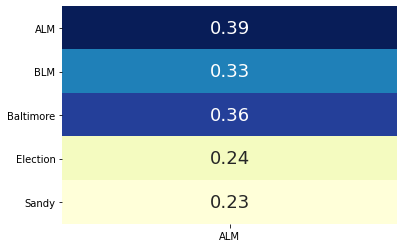

In [20]:
sns.heatmap(perform_df, annot=True, cmap="YlGnBu", annot_kws={"size": 18}, cbar=False)

<AxesSubplot:>

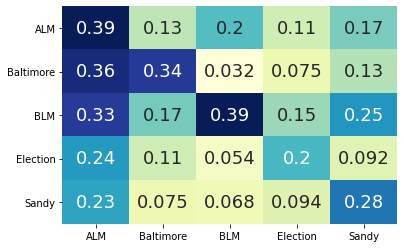

In [22]:
sns.heatmap(domain_perform_df, annot=True, cmap="YlGnBu", annot_kws={"size": 18}, cbar=False)

In [28]:
unique_labels = set()
for idx, row in test.iterrows():
    for label in str(row.labels).split(','):
        unique_labels.add(label)
unique_labels = list(unique_labels)
print(unique_labels)

['subversion', 'loyalty', 'care', 'cheating', 'nan', 'purity', 'fairness', 'non-moral', 'degradation', 'betrayal', 'harm', 'authority']


In [35]:
def label_encoder(raw_label):
    all_labels = [
        'subversion', 'loyalty', 'care', 'cheating',
        'purity', 'fairness', 'degradation', 'betrayal', 'harm', 'authority'
    ]
    encode_label = [0]*(len(all_labels) + 1)
    if type(raw_label) != str:
        encode_label[-1] = 1
        return encode_label
    for label in raw_label.split(','):
        if label not in all_labels:
            encode_label[-1] = 1
        else:
            encode_label[all_labels.index(label)] = 1
    return encode_label

In [144]:
def micro_f1_average(y_preds, y_truths):
    precisions = []
    recalls = []
    for idx, (y_pred, y_truth) in enumerate(zip(y_preds, y_truths)):
        true_positives = np.sum(np.logical_and(y_truth, y_pred))

        # compute the sum of tp + fp across training examples and labels
        l_prec_den = np.sum(y_pred)
        if l_prec_den != 0:
            # compute micro-averaged precision
            precisions.append(true_positives/l_prec_den)
        
        # compute sum of tp + fn across training examples and labels
        l_recall_den = np.sum(y_truth)

        # compute mirco-average recall
        if l_recall_den != 0:
            recalls.append(true_positives/l_recall_den)

    precisions = np.mean(precisions)
    recalls = np.mean(recalls)
    if precisions + recalls == 0:
        return 0
    f1 = 2*precisions*recalls / (precisions + recalls)
    return f1

In [153]:
# test in-domain and out-domain classification performance
# first split each corpus into train and test indices
domain_corpus = {}
for domain in tqdm(test.corpus.unique()):
    domain_df = test[test.corpus == domain]
    domain_df.labels = domain_df.labels.apply(lambda raw_label: label_encoder(raw_label))
    docs = [str(item) for item in domain_df.text]
    labels = domain_df.labels.tolist()
    
    x_train, x_test, y_train, y_test = train_test_split(
        docs, labels, test_size=0.2, random_state=33)
    domain_corpus[domain] = {}
    domain_corpus[domain]['x_test'] = x_test
    domain_corpus[domain]['y_test'] = y_test
    domain_corpus[domain]['vect'] = TfidfVectorizer(
        ngram_range=(1, 3), min_df=2, max_features=15000,
        max_df=0.9, # stop_words=spw_set, 
    )
    domain_corpus[domain]['x_train'] = x_train
    domain_corpus[domain]['y_train'] = y_train
    domain_corpus[domain]['vect'].fit(docs)
    domain_corpus[domain]['clf'] = OneVsRestClassifier(
        LogisticRegression(class_weight='balanced', max_iter=2000, n_jobs=-1),
        n_jobs=-1
    )
    domain_corpus[domain]['clf'].fit(domain_corpus[domain]['vect'].transform(x_train), y_train)

domain_perform = {}
for domain_i in tqdm(domain_corpus):
    if domain_i in ['Davidson', 'MeToo']:
        continue
    if domain_i not in domain_perform:
        domain_perform[domain_i] = {}
    for domain_j in domain_corpus:
        if domain_j in ['Davidson', 'MeToo']:
            continue
        y_preds = domain_corpus[domain_i]['clf'].predict(
            domain_corpus[domain_i]['vect'].transform(domain_corpus[domain_j]['x_test']))
        domain_perform[domain_i][domain_j] = micro_f1_average(
            y_preds=y_preds, y_truths=domain_corpus[domain_j]['y_test']
        )
domain_perform_df = pd.DataFrame(domain_perform)
print(domain_perform_df)

100%|██████████| 7/7 [00:00<00:00,  7.07it/s]

                ALM  Baltimore       BLM  Election     Sandy
ALM        0.669566   0.388162  0.612905  0.542321  0.403974
Baltimore  0.502732   0.702172  0.563069  0.630991  0.186433
BLM        0.714809   0.431252  0.827185  0.676323  0.574865
Election   0.569736   0.492429  0.573807  0.710522  0.320677
Sandy      0.471237   0.335189  0.452403  0.422364  0.606526


<AxesSubplot:>

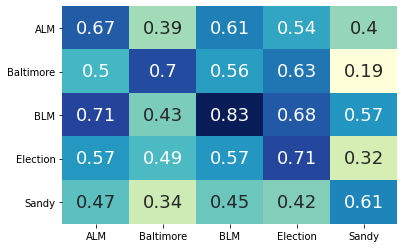

In [154]:
sns.heatmap(domain_perform_df, annot=True, cmap="YlGnBu", annot_kws={"size": 18}, cbar=False)

In [61]:
# load the vaccine data and test the classifier on the vaccine data
vaccine_df = pd.read_csv('../data/vaccine_morality.csv')

In [62]:
vaccine_df.head(5)

tweet_id                                               text  \
0  1343306143439986695  Why would we need an immunity passport to fly ...   
1  1385583103272435717  My neck been hurting since I got the covid vac...   
2  1289321682142785538  A #COVID19 vaccine willl be appreciated in Aug...   
3  1382365802549039106  @MillerStrib holding back everyone until we co...   
4  1334916023695396867  i’ve done drugs that i found on the ground at ...   

   relatedness  intention  subversion  authority  cheating  fairness  harm  \
0            1          1         1.0        NaN       1.0       NaN   NaN   
1            1          1         NaN        NaN       NaN       NaN   1.0   
2            1          1         NaN        NaN       NaN       NaN   NaN   
3            1          0         NaN        NaN       NaN       NaN   NaN   
4            1          1         NaN        NaN       NaN       NaN   1.0   

   care  betrayal  loyalty  purity  degradation  Moral (Grateful/Thankful)  \
0   NaN       NaN      NaN     NaN          NaN                        NaN   
1   NaN       NaN      NaN     NaN          NaN                        NaN   
2   NaN       NaN      NaN     NaN          NaN                        NaN   
3   NaN       NaN      NaN     NaN          NaN                        NaN   
4   NaN       NaN      NaN     NaN          1.0                        NaN   

   Moral/Intellectual Shaming  nonmoral              user_id  \
0                         NaN       NaN           2491404032   
1                         NaN       NaN  1326444006205779968   
2                         NaN       1.0  1161626391080775680   
3                         NaN       1.0            152803852   
4                         NaN       NaN             56824872   

                             date  \
0  Sun Dec 27 21:21:56 +0000 2020   
1  Fri Apr 23 13:15:29 +0000 2021   
2  Fri Jul 31 22:06:58 +0000 2020   
3  Wed Apr 14 16:11:05 +0000 2021   
4  Fri Dec 04 17:42:36 +0000 2020   

                                        location  
0                        United States,Georgia,x  
1  United States,District of Columbia,Washington  
2                              United States,x,x  
3             United States,Missouri,Kansas City  
4            United States,Michigan,Grand Rapids

In [ ]:
# ['subversion', 'loyalty', 'care', 'cheating', 'nan', 'purity', 'fairness', 'non-moral', 
# 'degradation', 'betrayal', 'harm', 'authority']

In [65]:
vaccine_data = {
    'train_x': [],
    'train_y': [],
}

all_labels = [
    'subversion', 'loyalty', 'care', 'cheating',
    'purity', 'fairness', 'degradation', 'betrayal', 'harm', 'authority'
]

for idx, row in vaccine_df.iterrows():
    encode_label = [0] * (len(all_labels) + 1)
    for label_index, label in enumerate(all_labels):
        if row[label_index] == 1:
            encode_label[label_index] = 1
    if sum(encode_label) == 0:
        encode_label[-1] = 1
    vaccine_data['train_x'].append(row['text'])
    vaccine_data['train_y'].append(encode_label)

In [68]:
print(vaccine_data['train_x'][:5])
print(vaccine_data['train_y'][:5])

['Why would we need an immunity passport to fly proving we had a covid vaccine when anyone who wanted has been flying for months?', 'My neck been hurting since I got the covid vaccine 😭 wtf', 'A #COVID19 vaccine willl be appreciated in August 🙏🏻😪😢🥺😩😚', "@MillerStrib holding back everyone until we confirm it's covid or vaccine sideeffects before the dunking begins https://t.co/UMRlusa88g", 'i’ve done drugs that i found on the ground at a la dispute concert so no i’m not worried about what’s in the covid vaccine.']
[[0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0], [0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0], [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0]]


In [155]:
# test on vaccine
for domain_i in tqdm(domain_corpus):
    if domain_i in ['Davidson', 'MeToo']:
        continue
    y_preds = domain_corpus[domain_i]['clf'].predict(
        domain_corpus[domain_i]['vect'].transform(vaccine_data['train_x']))
    domain_perform[domain_i]['vaccine'] = micro_f1_average(
        y_preds=y_preds, y_truths=vaccine_data['train_y']
    )
domain_perform_df = pd.DataFrame(domain_perform)
print(domain_perform_df)

100%|██████████| 7/7 [00:00<00:00, 66.22it/s]

                ALM  Baltimore       BLM  Election     Sandy
ALM        0.669566   0.388162  0.612905  0.542321  0.403974
Baltimore  0.502732   0.702172  0.563069  0.630991  0.186433
BLM        0.714809   0.431252  0.827185  0.676323  0.574865
Election   0.569736   0.492429  0.573807  0.710522  0.320677
Sandy      0.471237   0.335189  0.452403  0.422364  0.606526
vaccine    0.026887   0.014737  0.029669  0.023303  0.108035


<AxesSubplot:>

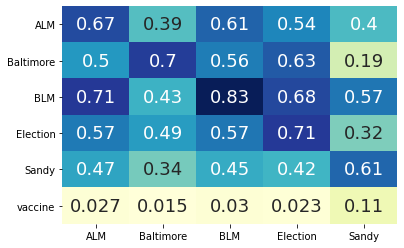

In [156]:
sns.heatmap(domain_perform_df, annot=True, cmap="YlGnBu", annot_kws={"size": 18}, cbar=False)

In [182]:
# continuous training
for domain in tqdm(test.corpus.unique()):
    domain_corpus[domain]['clf'].fit(
        domain_corpus[domain]['vect'].transform(
            domain_corpus[domain]['x_train'] + vaccine_data['train_x'][:100]
        ), domain_corpus[domain]['y_train'] + vaccine_data['train_y'][:100])
    
    if domain_i in ['Davidson', 'MeToo']:
        continue
    y_preds = domain_corpus[domain_i]['clf'].predict(
        domain_corpus[domain_i]['vect'].transform(vaccine_data['train_x'][100:]))
    domain_perform[domain_i]['vaccine'] = micro_f1_average(
        y_preds=y_preds, y_truths=vaccine_data['train_y'][100:]
    )
domain_perform_df = pd.DataFrame(domain_perform)
print(domain_perform_df)

100%|██████████| 7/7 [00:03<00:00,  2.10it/s]

                ALM  Baltimore       BLM  Election     Sandy
ALM        0.669566   0.388162  0.612905  0.542321  0.403974
Baltimore  0.502732   0.702172  0.563069  0.630991  0.186433
BLM        0.714809   0.431252  0.827185  0.676323  0.574865
Election   0.569736   0.492429  0.573807  0.710522  0.320677
Sandy      0.471237   0.335189  0.452403  0.422364  0.606526
vaccine    0.026887   0.014737  0.029669  0.023303  0.658468


In [173]:
# train all Twitter 35K documents and apply on the vaccine
all_twitter_vect = TfidfVectorizer(
    ngram_range=(1, 3), min_df=2, max_features=15000,
    max_df=0.9, # stop_words=spw_set, 
)
all_twitter_vect.fit(test.text)
all_twitter_labels = test.labels.apply(lambda x: label_encoder(x)).tolist()

In [179]:
all_twitter_clf = OneVsRestClassifier(
    LogisticRegression(class_weight='balanced', max_iter=2000, n_jobs=-1),
    n_jobs=-1
)
all_twitter_clf.fit(all_twitter_vect.transform(test.text), all_twitter_labels)
vaccine_y_preds = all_twitter_clf.predict(all_twitter_vect.transform(vaccine_data['train_x']))
print(micro_f1_average(y_preds=vaccine_y_preds, y_truths=vaccine_data['train_y']))

0.029875067897881587


In [180]:
vaccine_y_preds[:10]

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])

In [181]:
vaccine_data['train_y'][:10]

[[0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0],
 [0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0]]

In [188]:
# add few examples
# train all Twitter 35K documents and apply on the vaccine
all_twitter_vect = TfidfVectorizer(
    ngram_range=(1, 3), min_df=2, max_features=15000,
    max_df=0.9, # stop_words=spw_set, 
)
twitter_vaccine_docs = test.text.tolist() + vaccine_data['train_x'][:100]
all_twitter_vect.fit(twitter_vaccine_docs)
twitter_vaccine_labels = test.labels.apply(lambda x: label_encoder(x)).tolist() + vaccine_data['train_y'][:100]

all_twitter_clf = OneVsRestClassifier(
    LogisticRegression(class_weight='balanced', max_iter=2000, n_jobs=-1),
    n_jobs=-1
)
all_twitter_clf.fit(all_twitter_vect.transform(twitter_vaccine_docs), twitter_vaccine_labels)
vaccine_y_preds = all_twitter_clf.predict(all_twitter_vect.transform(vaccine_data['train_x'][100:]))
print(micro_f1_average(y_preds=vaccine_y_preds, y_truths=vaccine_data['train_y'][100:]))

0.761637504200991
